# **Import Library yang dibutuhkan**

In [ ]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_SoloLeveling_1.csv")
df.head()

,userName,score,at,content
0,Dava Al faris,4,2024-05-19 01:07:00,"dari game play seru abis, tapi masih rada sere..."
1,Danz Squad,3,2024-05-19 01:05:09,perbaiki banyak bug min
2,Novi Agus,1,2024-05-19 01:03:04,Game buffering doang awkwkwk mending uninstall...
3,AKIRAジ HAMZ,1,2024-05-19 00:54:59,tidak sesempurna di iklan
4,Ozy Lavino,2,2024-05-19 00:51:56,Why your game always crash


In [ ]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"dari game play seru abis, tapi masih rada sere...",Dava Al faris,2024-05-19 01:07:00
1,perbaiki banyak bug min,Danz Squad,2024-05-19 01:05:09
2,Game buffering doang awkwkwk mending uninstall...,Novi Agus,2024-05-19 01:03:04
3,tidak sesempurna di iklan,AKIRAジ HAMZ,2024-05-19 00:54:59
4,Why your game always crash,Ozy Lavino,2024-05-19 00:51:56
...,...,...,...
990,Download data mengulang kembali dari satu pada...,Dimas The best,2024-05-17 02:22:07
991,Kadang susah masuk kadang bisa kadang diam kad...,jantis sihombing,2024-05-17 02:21:25
992,keren,Alegra Jalujugala santika,2024-05-17 02:18:18
993,mantap banget,Galih Jati,2024-05-17 02:15:40


In [ ]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   995 non-null    object
 1   userName  995 non-null    object
 2   at        995 non-null    object
dtypes: object(3)
memory usage: 23.4+ KB


In [ ]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,995,995,995
unique,922,995,995
top,mantap,Dava Al faris,2024-05-19 01:07:00
freq,16,1,1


# **Cleaning Data & Case Folding**

In [ ]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(995, 3)

In [ ]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [ ]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [ ]:
# Menghapus data yang kosong
df = df.dropna()

In [ ]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [ ]:
df.shape

(922, 3)

In [ ]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [ ]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,dari game play seru abis tapi masih rada seret...,Dava Al faris,2024-05-19 01:07:00
1,perbaiki banyak bug min,Danz Squad,2024-05-19 01:05:09
2,game buffering doang awkwkwk mending uninstall...,Novi Agus,2024-05-19 01:03:04
3,tidak sesempurna di iklan,AKIRAジ HAMZ,2024-05-19 00:54:59
4,why your game always crash,Ozy Lavino,2024-05-19 00:51:56
...,...,...,...
989,bagusss,Anim STUDIO ID,2024-05-17 02:28:20
990,download data mengulang kembali dari satu pada...,Dimas The best,2024-05-17 02:22:07
991,kadang susah masuk kadang bisa kadang diam kad...,jantis sihombing,2024-05-17 02:21:25
993,mantap banget,Galih Jati,2024-05-17 02:15:40


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [ ]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,dari game play seru abis tapi masih rada seret...,Dava Al faris,2024-05-19 01:07:00
1,perbaiki banyak bug min,Danz Squad,2024-05-19 01:05:09
2,game buffering doang awkwkwk mending uninstall...,Novi Agus,2024-05-19 01:03:04
3,tidak sesempurna di iklan,AKIRAジ HAMZ,2024-05-19 00:54:59
4,why your game always crash,Ozy Lavino,2024-05-19 00:51:56
...,...,...,...
989,bagusss,Anim STUDIO ID,2024-05-17 02:28:20
990,download data mengulang kembali dari satu pada...,Dimas The best,2024-05-17 02:22:07
991,kadang susah masuk kadang bisa kadang diam kad...,jantis sihombing,2024-05-17 02:21:25
993,mantap banget,Galih Jati,2024-05-17 02:15:40


In [ ]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,game play seru abis masih rada seret ada bug n...,Dava Al faris,2024-05-19 01:07:00
1,perbaiki banyak bug min,Danz Squad,2024-05-19 01:05:09
2,game buffering doang awkwkwk mending uninstall...,Novi Agus,2024-05-19 01:03:04
3,sesempurna iklan,AKIRAジ HAMZ,2024-05-19 00:54:59
4,why your game always crash,Ozy Lavino,2024-05-19 00:51:56
...,...,...,...
989,bagusss,Anim STUDIO ID,2024-05-17 02:28:20
990,download data mengulang dari satu padahal udah...,Dimas The best,2024-05-17 02:22:07
991,kadang susah masuk kadang kadang diam kadang h...,jantis sihombing,2024-05-17 02:21:25
993,mantap banget,Galih Jati,2024-05-17 02:15:40


In [ ]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [game, play, seru, abis, masih, rada, seret, a...
1                           [perbaiki, banyak, bug, min]
2      [game, buffering, doang, awkwkwk, mending, uni...
3                                    [sesempurna, iklan]
4                       [why, your, game, always, crash]
                             ...                        
989                                            [bagusss]
990    [download, data, mengulang, dari, satu, padaha...
991    [kadang, susah, masuk, kadang, kadang, diam, k...
993                                     [mantap, banget]
994    [game, nya, ada, bug, contoh, kayak, pas, mau,...
Name: content, Length: 922, dtype: object

In [ ]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SoloLeveling_1.csv', index = False)


In [ ]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SoloLeveling_1.csv', encoding = 'latin1')
df_clean

,content
0,game play seru abis masih rada seret ada bug n...
1,baik banyak bug min
2,game buffering doang awkwkwk mending uninstall...
3,sempurna iklan
4,why your game always crash
...,...
917,bagusss
918,download data ulang dari satu padahal udah persen
919,kadang susah masuk kadang kadang diam kadang h...
920,mantap banget


# **Translate**

In [ ]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [ ]:
import pandas as pd
from easynmt import EasyNMT

In [ ]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_SoloLeveling_1.csv', encoding='latin1')

In [ ]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [ ]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 11.1MB/s]                   


In [ ]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,game play seru abis masih rada seret ada bug n...
1,baik banyak bug min
2,game buffering doang awkwkwk mending uninstall...
3,sempurna iklan
4,why your game always crash
...,...
917,bagusss
918,download data ulang dari satu padahal udah persen
919,kadang susah masuk kadang kadang diam kadang h...
920,mantap banget


In [ ]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SoloLeveling_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SoloLeveling_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game play seru abis masih rada seret ada bug n...,The fun play game is still dragging. There are...
1,1,baik banyak bug min,good lots of bugs min
2,2,game buffering doang awkwkwk mending uninstall...,Game buffering just awkwkwk meding uninstall it
3,3,sempurna iklan,Perfect ad
4,4,why your game always crash,why your game always crash
...,...,...,...
917,917,bagusss,goodsss
918,918,download data ulang dari satu padahal udah persen,Download data from one percent
919,919,kadang susah masuk kadang kadang diam kadang h...,Sometimes it's hard to get in. Sometimes it's ...
920,920,mantap banget,That's great.


# **Labeling**

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SoloLeveling_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game play seru abis masih rada seret ada bug n...,The fun play game is still dragging. There are...
1,1,baik banyak bug min,good lots of bugs min
2,2,game buffering doang awkwkwk mending uninstall...,Game buffering just awkwkwk meding uninstall it
3,3,sempurna iklan,Perfect ad
4,4,why your game always crash,why your game always crash
...,...,...,...
917,917,bagusss,goodsss
918,918,download data ulang dari satu padahal udah persen,Download data from one percent
919,919,kadang susah masuk kadang kadang diam kadang h...,Sometimes it's hard to get in. Sometimes it's ...
920,920,mantap banget,That's great.


In [ ]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 421
Netral = 276
Negatif = 225

Total Data Seluruhnya : 922


In [ ]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,game play seru abis masih rada seret ada bug n...,The fun play game is still dragging. There are...,Positif
1,1,baik banyak bug min,good lots of bugs min,Positif
2,2,game buffering doang awkwkwk mending uninstall...,Game buffering just awkwkwk meding uninstall it,Negatif
3,3,sempurna iklan,Perfect ad,Positif
4,4,why your game always crash,why your game always crash,Negatif
...,...,...,...,...
917,917,bagusss,goodsss,Netral
918,918,download data ulang dari satu padahal udah persen,Download data from one percent,Netral
919,919,kadang susah masuk kadang kadang diam kadang h...,Sometimes it's hard to get in. Sometimes it's ...,Negatif
920,920,mantap banget,That's great.,Positif


In [ ]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,game play seru abis masih rada seret ada bug n...,The fun play game is still dragging. There are...,Positif
1,baik banyak bug min,good lots of bugs min,Positif
2,game buffering doang awkwkwk mending uninstall...,Game buffering just awkwkwk meding uninstall it,Negatif
3,sempurna iklan,Perfect ad,Positif
4,why your game always crash,why your game always crash,Negatif
...,...,...,...
917,bagusss,goodsss,Netral
918,download data ulang dari satu padahal udah persen,Download data from one percent,Netral
919,kadang susah masuk kadang kadang diam kadang h...,Sometimes it's hard to get in. Sometimes it's ...,Negatif
920,mantap banget,That's great.,Positif


# **Visualisasi**


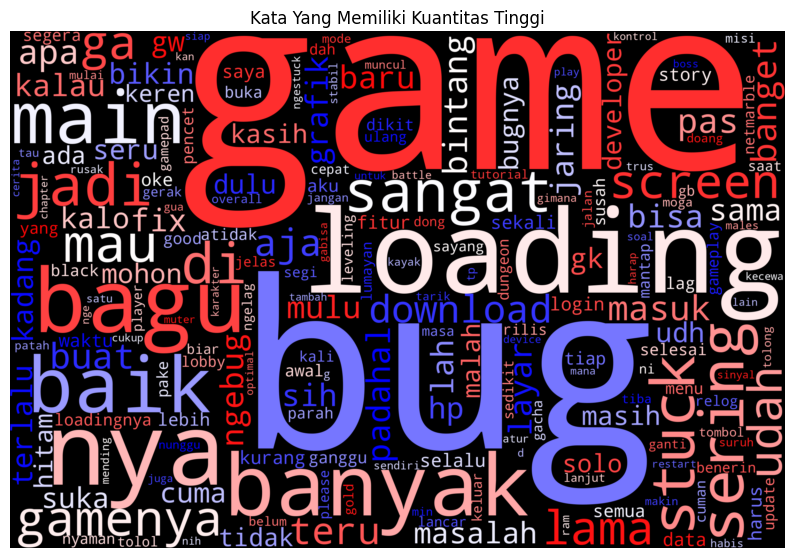

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


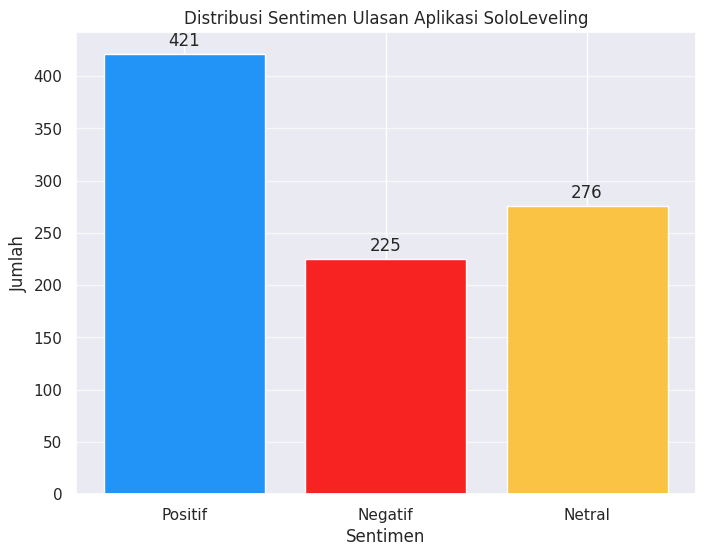

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SoloLeveling")


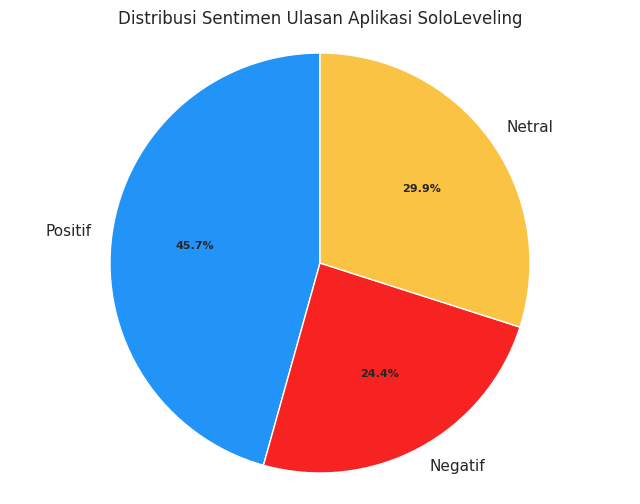

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SoloLeveling")

In [ ]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,game play seru abis masih rada seret ada bug n...,The fun play game is still dragging. There are...,Positif
1,baik banyak bug min,good lots of bugs min,Positif
2,game buffering doang awkwkwk mending uninstall...,Game buffering just awkwkwk meding uninstall it,Negatif
3,sempurna iklan,Perfect ad,Positif
4,why your game always crash,why your game always crash,Negatif
...,...,...,...
915,coba min perbakin frame sayaa padahall game am...,"Try mining my frame, but the game is safe. Why...",Positif
916,game nya sangat bagus segi story sangat nyambu...,The game's very good. The story face is so hot...,Positif
919,kadang susah masuk kadang kadang diam kadang h...,Sometimes it's hard to get in. Sometimes it's ...,Negatif
920,mantap banget,That's great.,Positif


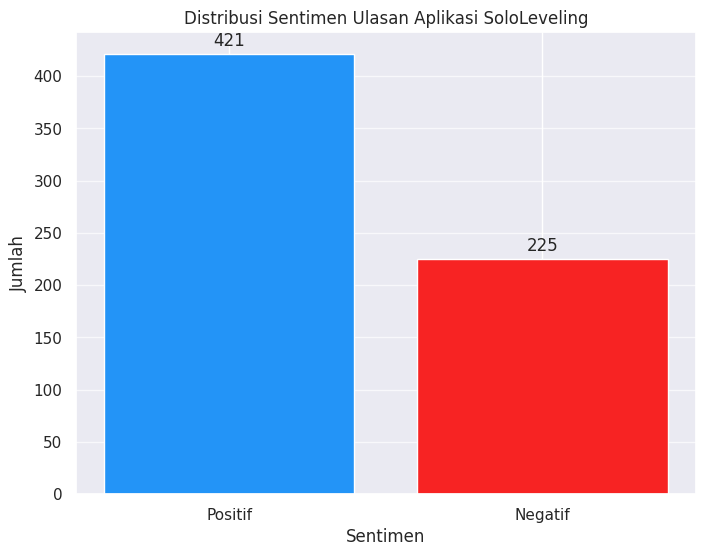

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SoloLeveling")


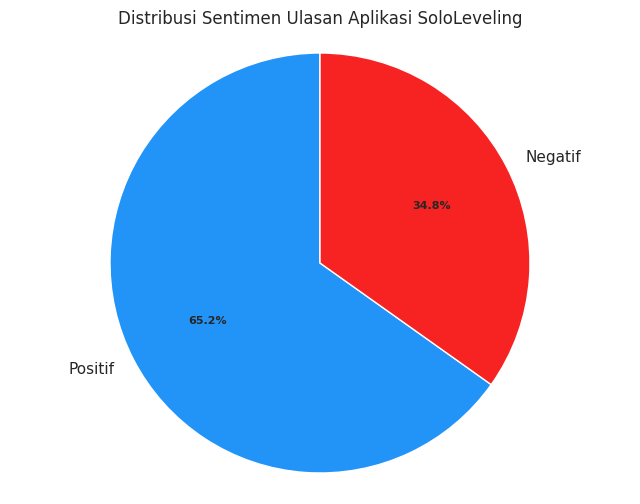

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SoloLeveling")

In [ ]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,game play seru abis masih rada seret ada bug n...,The fun play game is still dragging. There are...,1
1,baik banyak bug min,good lots of bugs min,1
2,game buffering doang awkwkwk mending uninstall...,Game buffering just awkwkwk meding uninstall it,0
3,sempurna iklan,Perfect ad,1
4,why your game always crash,why your game always crash,0
...,...,...,...
915,coba min perbakin frame sayaa padahall game am...,"Try mining my frame, but the game is safe. Why...",1
916,game nya sangat bagus segi story sangat nyambu...,The game's very good. The story face is so hot...,1
919,kadang susah masuk kadang kadang diam kadang h...,Sometimes it's hard to get in. Sometimes it's ...,0
920,mantap banget,That's great.,1


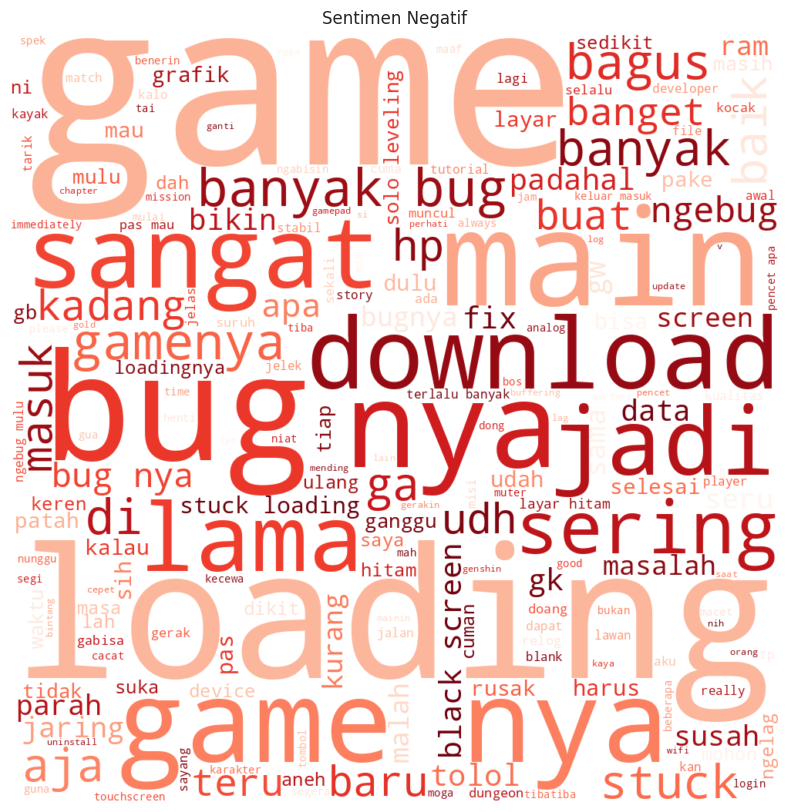

In [ ]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

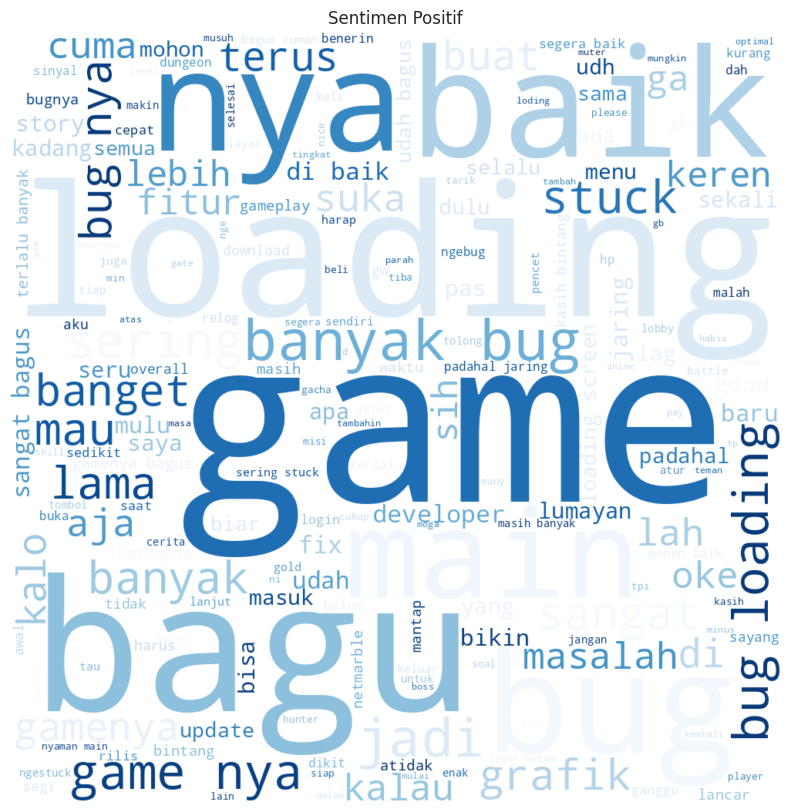

In [ ]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    421
0    225
Name: count, dtype: int64

# **Data Preparation**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

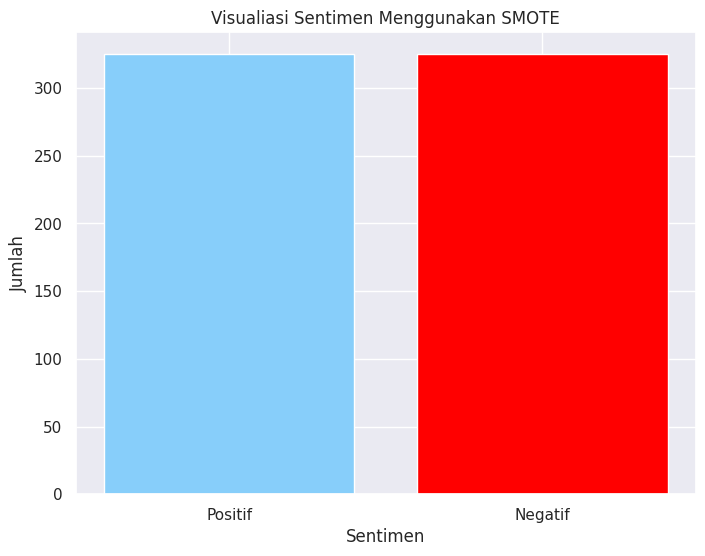

In [ ]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(X_test_vec)

In [ ]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7538461538461538

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.52      0.74      0.61        34
     Positif       0.89      0.76      0.82        96

    accuracy                           0.75       130
   macro avg       0.71      0.75      0.71       130
weighted avg       0.79      0.75      0.77       130



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[25  9]
 [23 73]]

Accuracy =  0.7538461538461538


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[25  9]
 [23 73]]

True Positives (TP) =  25

True Negatives (TN) =  73

False Positives (FP) =  9

False Negatives (FN) =  23

Accuracy =  0.7538461538461538


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

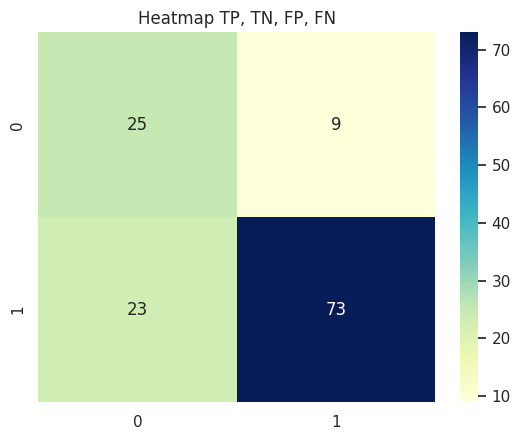

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [ ]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7538


In [ ]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2462


# **Testing**


In [ ]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : loading nya lama, banyak bug juga
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [ ]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : sangat bagus, grafik keren
Hasil Analisis Sentimen Untuk Teks Baru : Positif
